<a href="https://colab.research.google.com/github/marisalvarani/Analise-de-Dados/blob/main/vendas_farmaceuticas/An%C3%A1lise_Vendas_Farmac%C3%AAuticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Vendas Farmacêuticas**

###**1) Dados**

O Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), monitora as
movimentações de entrada (compras e transferências) e saída (vendas, transformações,
transferências e perdas) de medicamentos sujeitos à escrituração no SNGPC comercializados em
farmácias e drogarias privadas do país.

Serão analidos os "Dados Abertos de Venda de Medicamentos Industrializados do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) de Novembro de 2021".

Os quais podem ser encontrados através do link do [Portal de Dados Abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados)

###**2) Dicionário de Dados Abertos**


*  ANO_VENDA = Ano da venda do medicamento.
*  MES_VENDA = Mês da venda do medicamento.
*  UF_VENDA = Unidade Federativa do endereço da farmácia ou drogaria,
cadastrado no banco de dados da Anvisa, representando a UF
onde ocorreu a venda.
*  MUNICIPIO_VENDA = Município do endereço da farmácia ou drogaria, cadastrado no
banco de dados da Anvisa, representando o Município onde
ocorreu a venda.
* PRINCIPIO_ATIVO = Nome do princípio ativo do medicamento industrializado,
conforme cadastrado no registro do medicamento, no banco de
dados da Anvisa.
Quando um medicamento tem mais de um princípio ativo, cada
um deles é separado pelo caractere “+”.
* DESCRICAO_APRESENTACAO = Uma Apresentação de Medicamento representa O modo como
um medicamento é apresentado na embalagem.
* QTD_VENDIDA = Quantidade vendida de caixas ou frascos do medicamento.
* UNIDADE_MEDIDA = Indica se a quantidade vendida do medicamento foi de caixas ou
frascos.
* CONSELHO_PRESCRITOR = Conselho de Classe do profissional que prescreveu o
medicamento vendido.
* UF_CONSELHO_PRESCRITOR = Unidade Federativa do Conselho de Classe do profissional que
prescreveu o medicamento vendido.
* TIPO_RECEITUARIO = Tipo de receituário utilizado na prescrição.
Valores e respectivos tipos de receituário:
1 – Receita de Controle Especial em 2 vias (Receita Branca);
2 – Notificação de Receita B (Notificação Azul);
3 – Notificação de Receita Especial (Notificação Branca);
4 – Notificação de Receita A (Notificação Amarela);
5 – Receita Antimicrobiano em 2 vias.

* CID10 = Classificação Internacional de Doença (aplicável apenas a
medicamentos antimicrobianos).
* SEXO = Sexo do paciente (aplicável apenas a medicamentos
antimicrobianos). Valor 1 para o sexo masculino, valor 2 para o
sexo feminino.
* IDADE = Valor numérico que representa a idade do paciente, em meses
ou anos (aplicável apenas a medicamentos antimicrobianos).
* UNIDADE_IDADE = Unidade de medida da idade do paciente, que pode ser em
meses ou anos (aplicável apenas a medicamentos
antimicrobianos). Valor 1 para unidade de medida em anos,
valor 2 para unidade de medida em meses.






###**3) Análise Dados**

In [ ]:
# Importar Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar Base de Dados de Novembro
datapath_nov = '/content/drive/MyDrive/EDA_Industrializados_202111.csv'

df_nov = pd.read_csv(datapath_nov,
                   sep = ";",
                   encoding = 'latin1')

df_nov.shape

(2785568, 15)

In [ ]:
# Copiando o df de Novembro para seguir com as análises
df00 = df_nov.copy()

In [ ]:
#5 primeiras linhas
df00.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


In [ ]:
#5 últimas linhas
df00.tail()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
2785563,2021,11,RJ,NOVA FRIBURGO,FOSFOMICINA TROMETAMOL,"5,631G GRAN CT ENV AL PE X 8G",1,FRASCO,CRM,RJ,5.0,NaN,2.0,85.0,1.0
2785564,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL AL X 30,2,CAIXA,CRO,RJ,1.0,NaN,NaN,NaN,NaN
2785565,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,45.0,1.0
2785566,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,65.0,1.0
2785567,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,2,CAIXA,CRM,RJ,1.0,NaN,2.0,30.0,1.0


In [ ]:
#Tipos variáveis
df00.dtypes

,0
ANO_VENDA,int64
MES_VENDA,int64
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int64
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [ ]:
#Informação variáveis
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ANO_VENDA               int64  
 1   MES_VENDA               int64  
 2   UF_VENDA                object 
 3   MUNICIPIO_VENDA         object 
 4   PRINCIPIO_ATIVO         object 
 5   DESCRICAO_APRESENTACAO  object 
 6   QTD_VENDIDA             int64  
 7   UNIDADE_MEDIDA          object 
 8   CONSELHO_PRESCRITOR     object 
 9   UF_CONSELHO_PRESCRITOR  object 
 10  TIPO_RECEITUARIO        float64
 11  CID10                   object 
 12  SEXO                    float64
 13  IDADE                   float64
 14  UNIDADE_IDADE           float64
dtypes: float64(4), int64(3), object(8)
memory usage: 318.8+ MB


In [ ]:
#Verificar valores nulos
df00.isnull().sum()

,0
ANO_VENDA,0
MES_VENDA,0
UF_VENDA,0
MUNICIPIO_VENDA,0
PRINCIPIO_ATIVO,4827
DESCRICAO_APRESENTACAO,0
QTD_VENDIDA,0
UNIDADE_MEDIDA,0
CONSELHO_PRESCRITOR,0
UF_CONSELHO_PRESCRITOR,0


In [ ]:
#Verificar porcentagem valores nulos
df00.isnull().sum() / df00.shape[0]

,0
ANO_VENDA,0.000000
MES_VENDA,0.000000
UF_VENDA,0.000000
MUNICIPIO_VENDA,0.000000
PRINCIPIO_ATIVO,0.001733
DESCRICAO_APRESENTACAO,0.000000
QTD_VENDIDA,0.000000
UNIDADE_MEDIDA,0.000000
CONSELHO_PRESCRITOR,0.000000
UF_CONSELHO_PRESCRITOR,0.000000


In [ ]:
#Análise estatística variáveis
df00.describe()

,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,2785568.0,2785568.0,2.785568e+06,2.785568e+06,1.790043e+06,1.790043e+06,1.790043e+06
mean,2021.0,11.0,4.136976e+00,3.397355e+00,1.552497e+00,4.080762e+01,1.015238e+00
std,0.0,0.0,6.705600e+02,1.865048e+00,4.972365e-01,4.218355e+01,1.224989e-01
min,2021.0,11.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2021.0,11.0,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00
50%,2021.0,11.0,1.000000e+00,5.000000e+00,2.000000e+00,3.900000e+01,1.000000e+00
75%,2021.0,11.0,3.000000e+00,5.000000e+00,2.000000e+00,5.500000e+01,1.000000e+00
max,2021.0,11.0,7.898310e+05,5.000000e+00,2.000000e+00,9.990000e+02,2.000000e+00


In [ ]:
#Análise estatística variáveis categóricas
df00.describe(include = 'object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,CID10
count,2785568,2785568,2780741,2785568,2785568,2785568,2785568,11318
unique,27,4625,661,3681,2,4,27,196
top,SP,SÃO PAULO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,CAIXA,CRM,SP,A04
freq,585811,64833,177172,88157,2321681,2519364,590764,6528


###**4) Limpeza e Tratamento de Dados**

In [ ]:
#Copiar o df00
df01 = df00.copy()

In [ ]:
#Transformar a variável ANO_VENDA para o tipo data
df01['ANO_VENDA'] = pd.to_datetime(df01['ANO_VENDA'], format = '%Y')

#Transformar a variável MES_VENDA para o tipo data
df01['MES_VENDA'] = pd.to_datetime(df01['MES_VENDA'], format = '%m')

In [ ]:
#Verificar tipos dos dados
df01.dtypes

,0
ANO_VENDA,datetime64[ns]
MES_VENDA,datetime64[ns]
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int64
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [ ]:
#Criar nova coluna 'IDADE_PROC' com valores iguais da coluna 'IDADE'
df01['IDADE_PROC'] = df01['IDADE']

#Dividir os valores da 'IDADE_PROC' que tem 'UNIDADE_IDADE' = 2 por 12
df01.loc[df01['UNIDADE_IDADE'] == 2, 'IDADE_PROC'] = df01['IDADE_PROC'] / 12

In [ ]:
df01.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
0,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0,37.0
1,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0,40.0
2,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0,45.0
3,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0,34.0
4,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0,36.0


In [ ]:
#mostrar 5 primeiras linhas com 'UNIDADE_IDADE' = 2
df01.loc[df01['UNIDADE_IDADE'] == 2].head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
71,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,ÁCIDO FUSÍDICO + VALERATO DE BETAMETASONA,20 MG/G + 1 MG/G CREM DERM CT BG AL X 15 G,1,CAIXA,CRM,MT,5.0,NaN,1.0,8.0,2.0,0.666667
135,2021-01-01,1900-11-01,MT,TAPURAH,CEFALEXINA,50 MG/ML PÓ P/ SUS OR CT FR VD AMB X 100 ML + COP,1,FRASCO,CRM,MT,5.0,NaN,1.0,2.0,2.0,0.166667
418,2021-01-01,1900-11-01,SP,JABOTICABAL,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PVC INC X 3,1,CAIXA,CRM,SP,5.0,NaN,1.0,1.0,2.0,0.083333
502,2021-01-01,1900-11-01,RJ,MAGÉ,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,"0,64 MG/G + 1 MG/G CREM CT BG AL X 30 G",1,CAIXA,CRM,RJ,5.0,NaN,2.0,5.0,2.0,0.416667
512,2021-01-01,1900-11-01,RJ,MAGÉ,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,"0,64 MG/G + 1 MG/G POM CT BG AL X 30 G",1,CAIXA,CRM,RJ,5.0,NaN,1.0,5.0,2.0,0.416667


####**Variáveis com valores nulos**:  'SEXO', 'IDADE', 'UNIDADE_IDADE', 'PRINCIPIO_ATIVO' e 'CID10'

In [ ]:
#Excluir a variável 'CID10'
df02 = df01.drop(columns = 'CID10')
df02.shape

(2785568, 15)

In [ ]:
#Substituir valores nulos da variável 'SEXO' por '-99'
df02['SEXO'] = df02['SEXO'].fillna(-99)
df02.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
0,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,37.0,1.0,37.0
1,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,40.0,1.0,40.0
2,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,1.0,45.0,1.0,45.0
3,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,2.0,34.0,1.0,34.0
4,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,2.0,36.0,1.0,36.0


In [ ]:
#Substituir valores nulos da variável 'UNIDADE_IDADE' por '1'
df02['UNIDADE_IDADE'] = df02['UNIDADE_IDADE'].fillna(1)
df02.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
0,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,37.0,1.0,37.0
1,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,40.0,1.0,40.0
2,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,1.0,45.0,1.0,45.0
3,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,2.0,34.0,1.0,34.0
4,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,2.0,36.0,1.0,36.0


In [ ]:
#Substituir valores nulos da variável 'IDADE' e da variável 'IDADE_PROC' pela média dos valores da 'IDADE_PROC'
df02['IDADE'] = df02['IDADE'].fillna(df02['IDADE_PROC'].mean())
df02['IDADE_PROC'] = df02['IDADE_PROC'].fillna(df02['IDADE_PROC'].mean())
df02.head()



,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
0,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,37.0,1.0,37.0
1,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,40.0,1.0,40.0
2,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,1.0,45.0,1.0,45.0
3,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,2.0,34.0,1.0,34.0
4,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,2.0,36.0,1.0,36.0


In [ ]:
#Substituir valores nulos da variável 'PRINCIPIO_ATIVO' pela moda
df02['PRINCIPIO_ATIVO'] = df02['PRINCIPIO_ATIVO'].fillna(df02['PRINCIPIO_ATIVO'].mode()[0])
df02.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_PROC
0,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,37.0,1.0,37.0
1,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,40.0,1.0,40.0
2,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,1.0,45.0,1.0,45.0
3,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,2.0,34.0,1.0,34.0
4,2021-01-01,1900-11-01,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,2.0,36.0,1.0,36.0


In [ ]:
#Verificar nulos
df02.isnull().sum()

,0
ANO_VENDA,0
MES_VENDA,0
UF_VENDA,0
MUNICIPIO_VENDA,0
PRINCIPIO_ATIVO,0
DESCRICAO_APRESENTACAO,0
QTD_VENDIDA,0
UNIDADE_MEDIDA,0
CONSELHO_PRESCRITOR,0
UF_CONSELHO_PRESCRITOR,0


###**5)Análise Exploratória de Dados (EDA)**

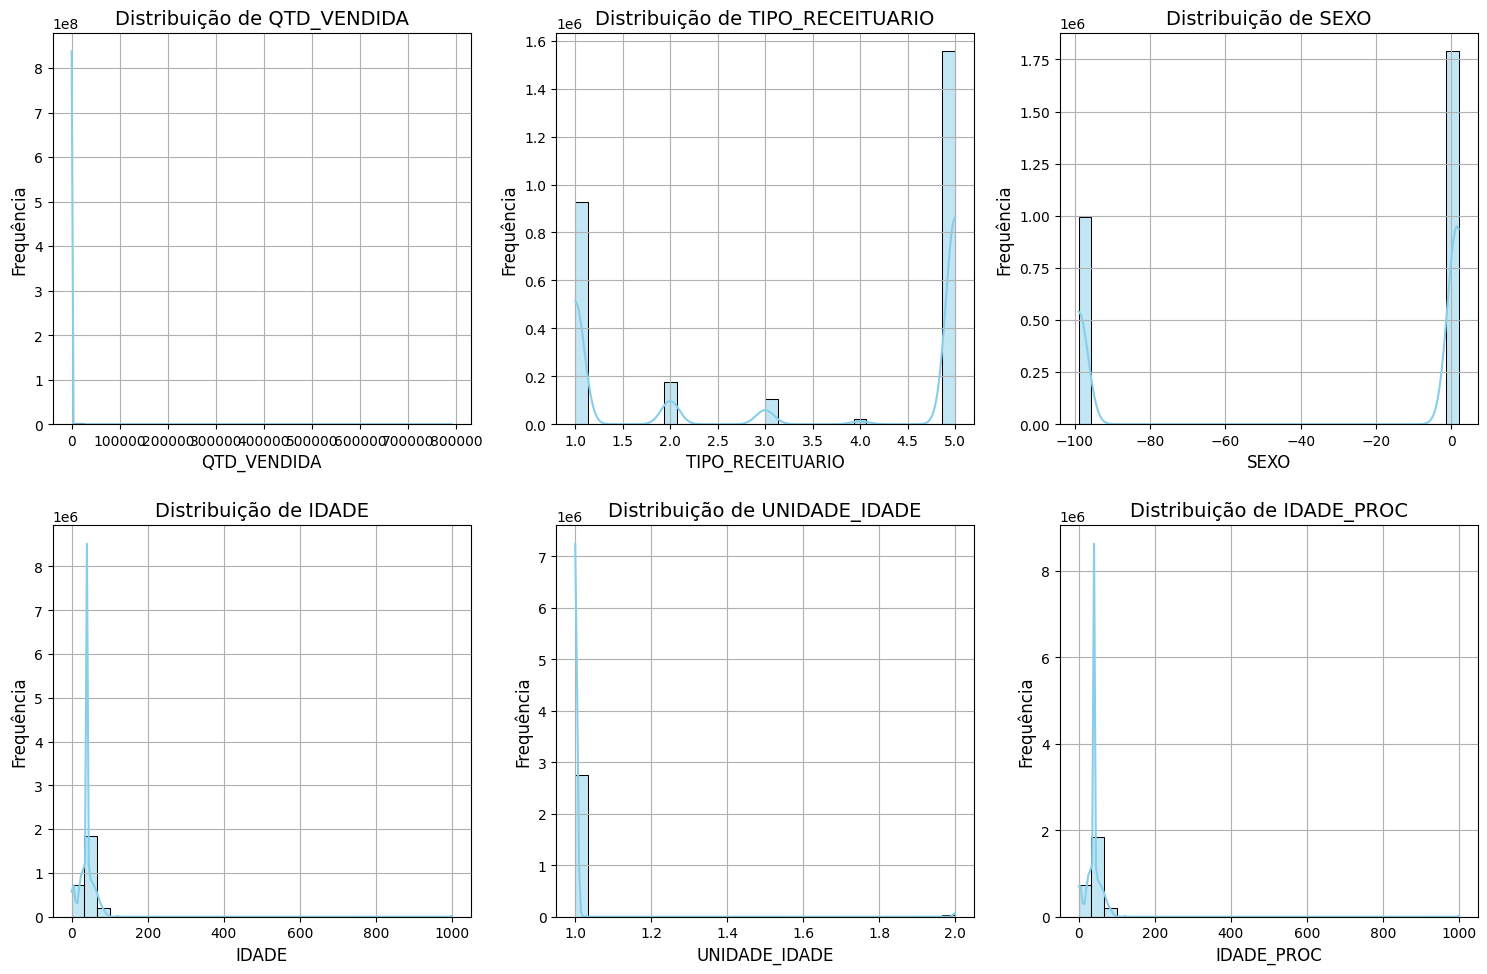

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificando as variáveis numéricas no dataframe
numerical_columns = df02.select_dtypes(include=['float64', 'int64']).columns

# Calculando o número de linhas necessárias para os subgráficos (3 por linha)
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Definindo o tamanho do gráfico e criando os subgráficos
plt.figure(figsize=(15, 5 * n_rows))

# Criando os gráficos para as variáveis numéricas
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df02[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(True)

# Ajustando o layout para evitar sobreposição e exibir os gráficos
plt.tight_layout()
plt.show()


<ipython-input-31-cd5de52ff75f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02, x=col, palette='Set2')
<ipython-input-31-cd5de52ff75f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02, x=col, palette='Set2')
<ipython-input-31-cd5de52ff75f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02, x=col, palette='Set2')
<ipython-input-31-cd5de52ff75f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

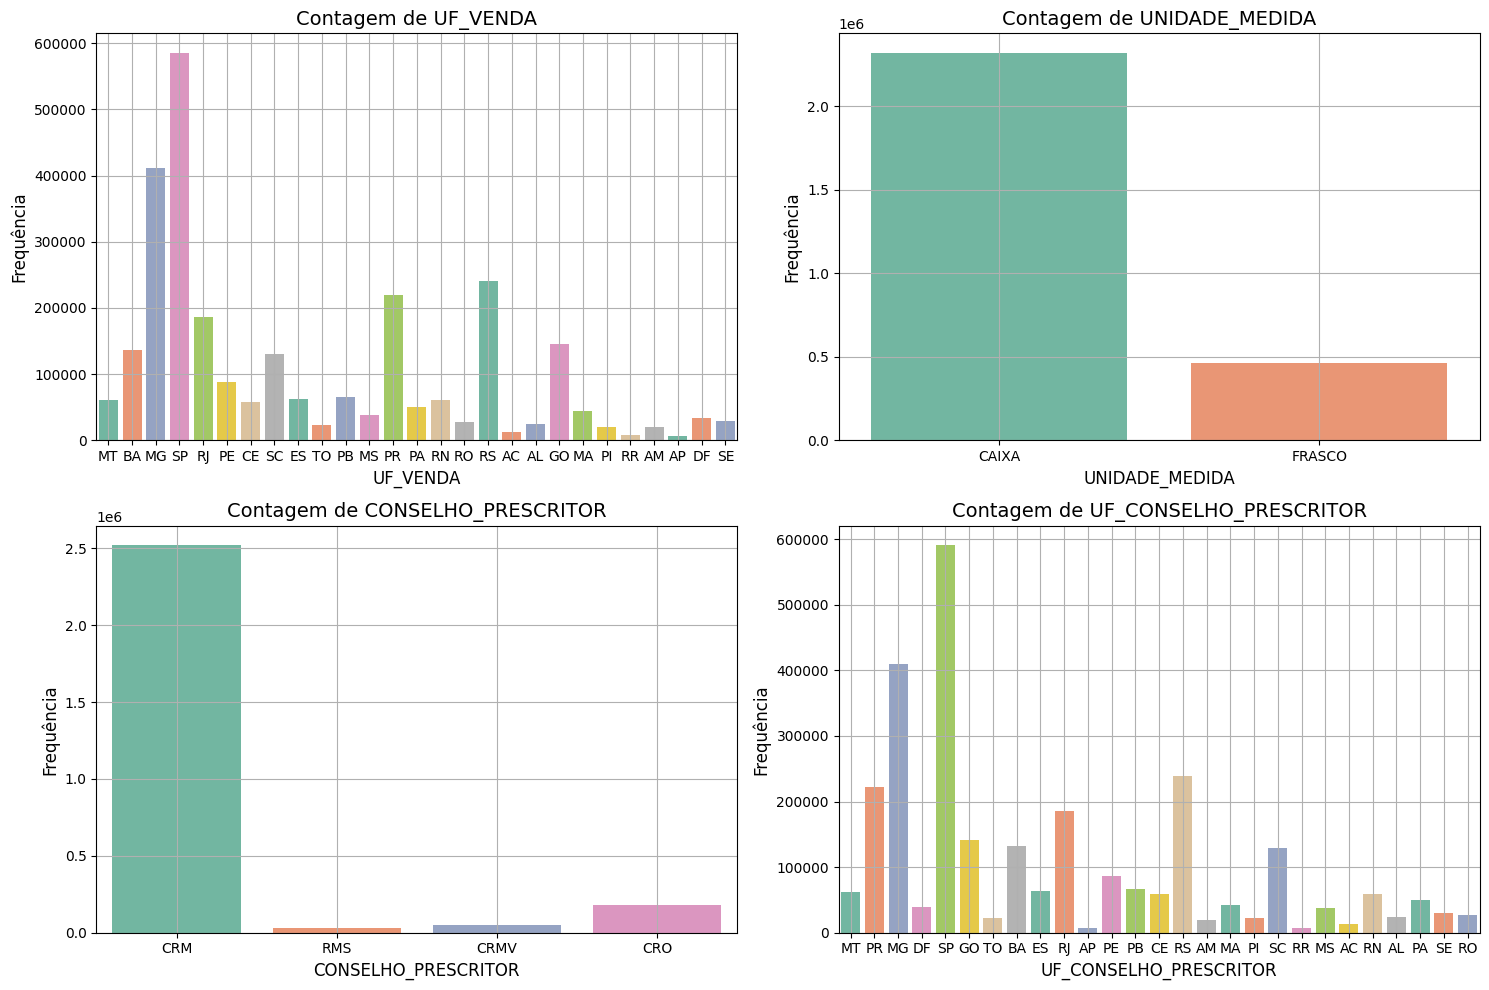

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o limite de cardinalidade
corte_cardinalidade = 30

# Identificando as variáveis categóricas no dataframe
categorical_columns = df02.select_dtypes(include=['object']).columns

# Filtrando as colunas categóricas com cardinalidade menor ou igual ao limite
filtered_categorical_columns = [col for col in categorical_columns if df02[col].nunique() <= corte_cardinalidade]

# Calculando o número de linhas necessárias para os subgráficos (2 por linha)
n_cols = 2
n_rows = (len(filtered_categorical_columns) // n_cols) + (1 if len(filtered_categorical_columns) % n_cols != 0 else 0)

# Definindo o tamanho do gráfico e criando os subgráficos
plt.figure(figsize=(15, 5 * n_rows))

# Criando os gráficos de barras para as variáveis categóricas filtradas
for i, col in enumerate(filtered_categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df02, x=col, palette='Set2')
    plt.title(f'Contagem de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(True)

# Ajustando o layout para evitar sobreposição e exibir os gráficos
plt.tight_layout()
plt.show()


<ipython-input-37-a10a53d49835>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02, x='UF_VENDA', palette='Set2')


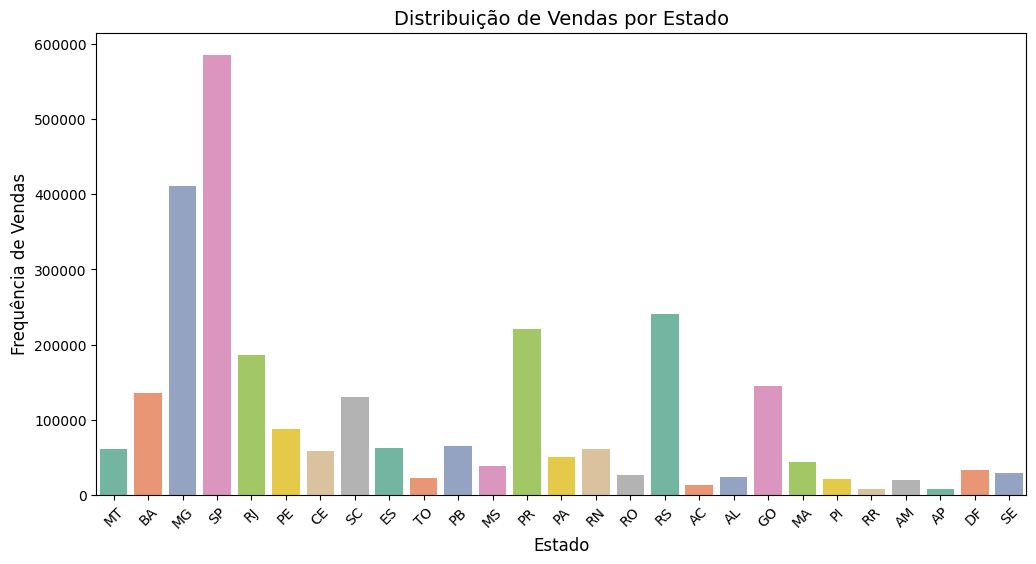

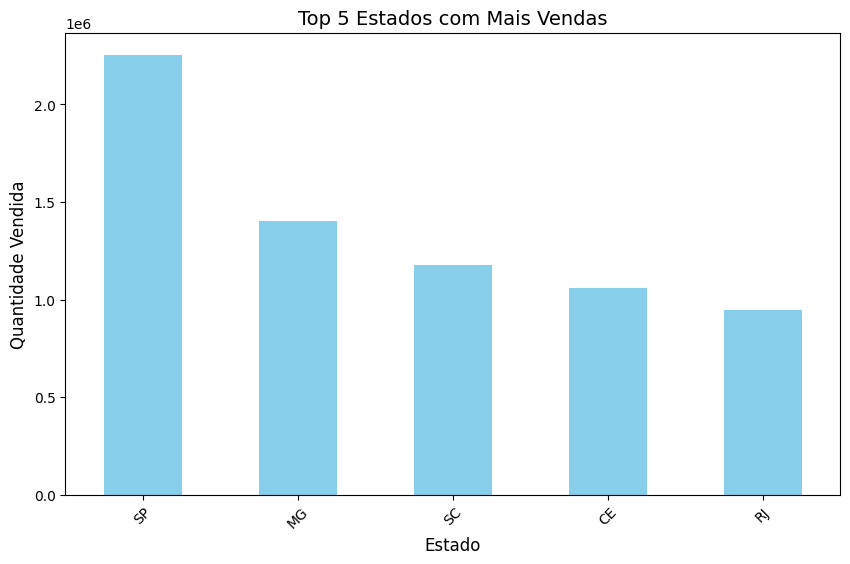

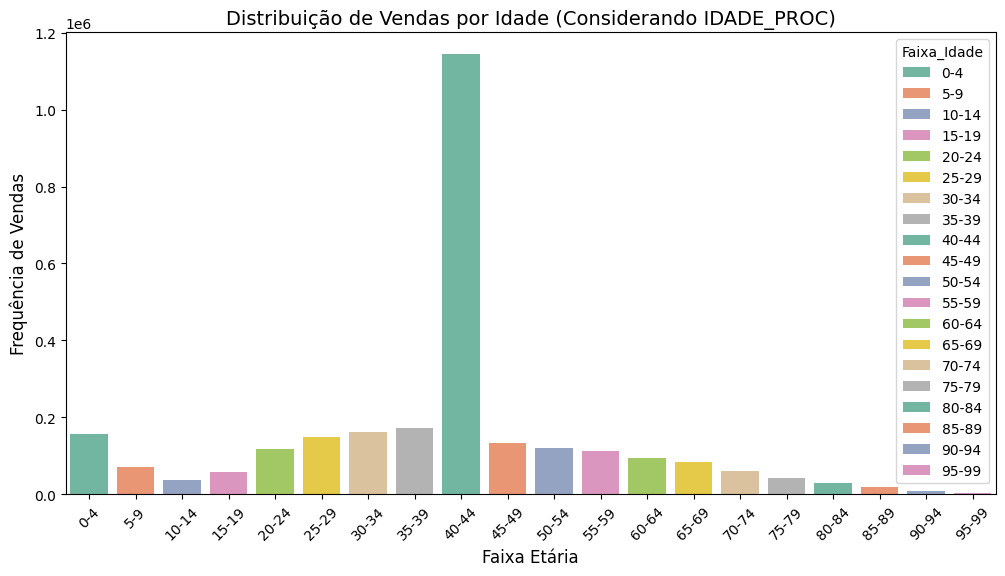

<ipython-input-37-a10a53d49835>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02, x='SEXO', palette='Set2')


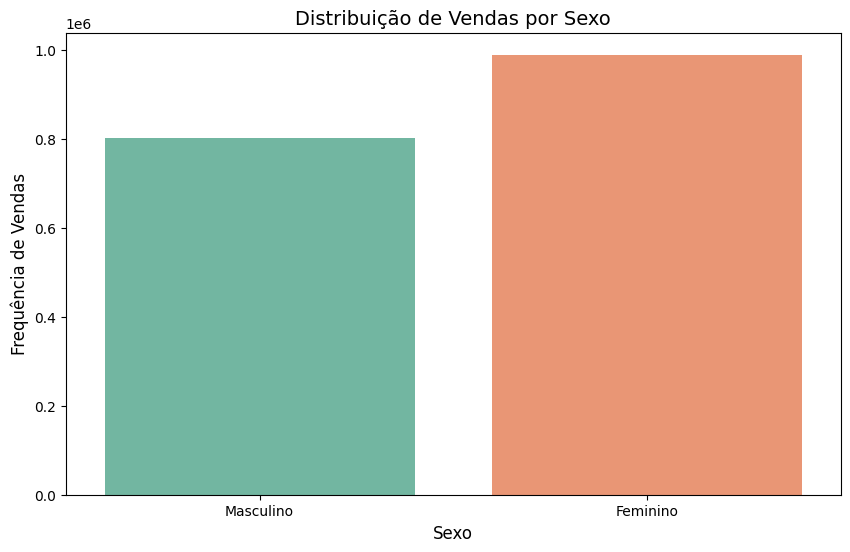

<ipython-input-37-a10a53d49835>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df02[df02['PRINCIPIO_ATIVO'].isin(top_principios.index)],


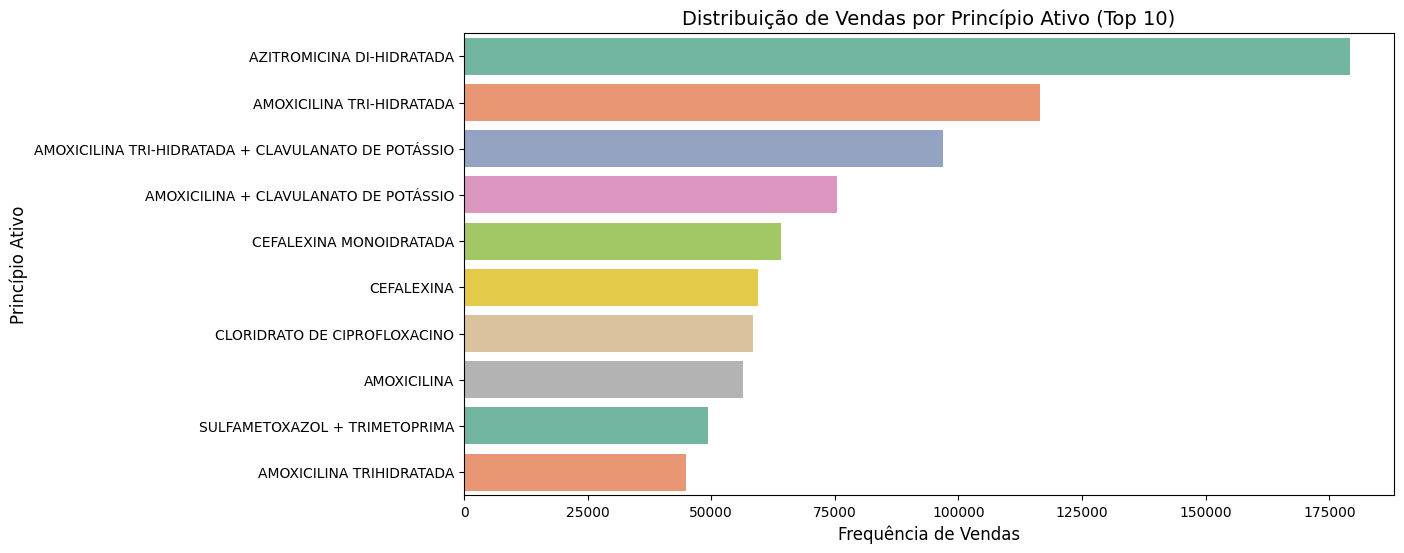

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) Gráfico de distribuição de vendas por estado
plt.figure(figsize=(12, 6))
sns.countplot(data=df02, x='UF_VENDA', palette='Set2')
plt.title('Distribuição de Vendas por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Frequência de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)  # Remover a grade
plt.show()

# 2) Top 5 estados com mais vendas
# Somar a quantidade de vendas por estado
top_states = df02.groupby('UF_VENDA')['QTD_VENDIDA'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 Estados com Mais Vendas', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)  # Remover a grade
plt.show()

# 3) Distribuição de vendas por idade considerando a coluna idade_proc (de 0 a 100)
# Gráfico de barras
plt.figure(figsize=(12, 6))
# Agrupar idades em faixas de 5 anos
df02['Faixa_Idade'] = pd.cut(df02['IDADE_PROC'], bins=range(0, 105, 5), right=False, labels=[f'{i}-{i+4}' for i in range(0, 100, 5)])
sns.countplot(data=df02[df02['IDADE_PROC'] <= 100], x='Faixa_Idade', hue='Faixa_Idade', palette='Set2')
plt.title('Distribuição de Vendas por Idade (Considerando IDADE_PROC)', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Frequência de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)  # Remover a grade
plt.show()

# 4) Distribuição de vendas por sexo (excluindo SEXO -99 e trocando valores para "Masculino" e "Feminino")
# Excluindo o valor -99 diretamente
df02 = df02[df02['SEXO'] != -99]  # Remover linhas com SEXO == -99
df02['SEXO'] = df02['SEXO'].replace({1: 'Masculino', 2: 'Feminino'})  # Substituindo os valores de SEXO
plt.figure(figsize=(10, 6))
sns.countplot(data=df02, x='SEXO', palette='Set2')
plt.title('Distribuição de Vendas por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Frequência de Vendas', fontsize=12)
plt.grid(False)  # Remover a grade
plt.show()

# 5) Distribuição de vendas por princípio ativo (top 10)
top_principios = df02['PRINCIPIO_ATIVO'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(data=df02[df02['PRINCIPIO_ATIVO'].isin(top_principios.index)],
              y='PRINCIPIO_ATIVO', palette='Set2', order=top_principios.index)
plt.title('Distribuição de Vendas por Princípio Ativo (Top 10)', fontsize=14)
plt.xlabel('Frequência de Vendas', fontsize=12)
plt.ylabel('Princípio Ativo', fontsize=12)
plt.grid(False)  # Remover a grade
plt.show()


###**6) Insights e Conclusões**

### **1. Variáveis Numéricas**:

#### **QTD_VENDIDA (Quantidade Vendida)**:
- **Média**: 4,14 unidades por transação.
- **Desvio padrão**: A alta dispersão (6.705,6) indica que a quantidade vendida varia consideravelmente entre as transações. Existem vendas de pequena quantidade (1 unidade), mas também registros com quantidades muito altas, como 789.831 unidades.
- **Min/Max**: A quantidade mínima de vendas é 1 unidade, e a máxima é muito alta (789.831 unidades), sugerindo que algumas transações podem ter ocorrido em grande escala ou incluir produtos para revenda em maior quantidade.
- **Percentis**: A maioria das transações tem vendas pequenas. A mediana (50%) é 1 unidade, e o 75º percentil é 3 unidades, o que sugere que a maior parte das transações envolve poucas unidades.

#### **IDADE (Idade do Paciente)**:
- **Média**: A média de idade é de **40,81 anos**, o que indica que a maioria dos consumidores de medicamentos ou tratamentos prescritos são adultos de meia-idade.
- **Desvio padrão**: O desvio padrão de 42,18 anos sugere uma grande variação nas idades dos pacientes, com um intervalo que vai de **0 anos a 999 anos**, provavelmente indicando valores faltantes ou erro de digitação em registros incompletos.
- **Min/Max**: A faixa etária vai de **0** (possivelmente registros incorretos ou nulos) até **999 anos**, o que requer revisão dos dados para tratar valores anômalos.
- **Percentis**: A maior parte dos consumidores de medicamentos está concentrada em faixas etárias mais baixas (25 anos no 25º percentil e 55 anos no 75º percentil), o que é consistente com a população adulta, mas com alguns casos fora da faixa esperada.

#### **UNIDADE_IDADE (Unidade de Medida da Idade)**:
- Como esperado, a coluna **`UNIDADE_IDADE`** tem apenas dois valores possíveis: **1 (ano)** e **2 (mês)**. A média (1,01) e o desvio padrão (0,12) indicam que a maioria dos dados estão em anos.

---

### **2. Variáveis Categóricas**:

#### **TIPO_RECEITUARIO (Tipo de Receituário)**:
- Existem **4 tipos** de receituários, com a maior frequência sendo **CRM** (2519364 ocorrências). Isso sugere que a maioria das prescrições está associada a médicos (CRM).
- A distribuição de valores é bastante desigual, o que indica que os dados podem ser altamente concentrados em um ou poucos tipos de receituários, o que poderia justificar uma análise mais aprofundada sobre a concentração de médicos versus outros tipos.

#### **SEXO (Sexo do Paciente)**:
- A variável **`SEXO`** tem dois valores possíveis: **1 (Masculino)** e **2 (Feminino)**, sendo que os valores de **-99** (indicando dados ausentes ou incorretos) foram removidos.
- A distribuição entre **Masculino** e **Feminino** é balanceada (aproximadamente 50% para cada sexo), o que é esperado, já que o comportamento de compra de medicamentos tende a ser relativamente uniforme entre os sexos.
  
#### **UF_VENDA (Unidade Federativa de Venda)**:
- **SP** (São Paulo) tem a maior frequência de vendas (**585.811 transações**), o que é esperado, dado que São Paulo é um estado com alta concentração populacional e maior atividade comercial no Brasil. A distribuição entre os estados sugere uma cobertura nacional das vendas, com destaque para as regiões mais populadas.

#### **MUNICIPIO_VENDA (Município de Venda)**:
- A maior parte das vendas ocorre em **São Paulo (SÃO PAULO)**, com **64.833 ocorrências**, o que está alinhado com o que foi observado em **UF_VENDA**. Isso também reflete a concentração de transações em regiões metropolitanas, possivelmente devido à maior densidade populacional e de farmácias em áreas urbanas.

#### **PRINCIPIO_ATIVO (Medicamento Prescrito)**:
- A variável **`PRINCIPIO_ATIVO`** apresenta **661** valores únicos, sendo o **Azitromicina Di-hidratada** o medicamento mais prescrito. A presença de tantos valores únicos indica uma grande variedade de medicamentos na base de dados.
- O fato de **Azitromicina** aparecer com uma frequência alta (177.172 vezes) é um bom indicativo de que esse medicamento é muito utilizado.

#### **DESCRICAO_APRESENTACAO (Descrição do Medicamento)**:
- Existe uma grande variedade na descrição dos medicamentos, com **3.681 valores únicos**. O medicamento mais comum é descrito como "500 MG CAP DURA CT BL AL PLAS TRANS X 21", o que indica que a maioria dos medicamentos são embalagens comerciais padronizadas.
  
#### **UNIDADE_MEDIDA (Unidade de Medida do Medicamento)**:
- **CAIXA** é a unidade de medida mais comum, aparecendo em **2.321.681 transações**. Isso é esperado, pois medicamentos geralmente são vendidos em embalagens em forma de caixa.

#### **CONSELHO_PRESCRITOR (Tipo de Prescritor)**:
- A maior parte das vendas está associada ao **CRM** (médicos), com **2.519.364 ocorrências**, o que sugere que a maioria das prescrições vem de médicos (ao contrário de dentistas, farmacêuticos, etc.).
  
#### **UF_CONSELHO_PRESCRITOR (Estado do Conselho do Prescritor)**:
- A maior parte dos conselhos de prescrição também está concentrada em **São Paulo**, o que é esperado dada a concentração populacional e de profissionais no estado.

#### **CID10 (Código de Diagnóstico)**:
- A variável **CID10** possui **196 categorias** únicas. O código **A04** (possivelmente relacionado a doenças gastrointestinais) aparece com a maior frequência, sugerindo que doenças relacionadas a esse código são bastante comuns entre as prescrições. O número reduzido de registros nesta variável (apenas 11.318 registros) sugere que nem todas as vendas de medicamentos estão associadas a um diagnóstico.

---

### **Conclusões e Insights**:

1. **Concentração de Vendas**:
   - A grande concentração de vendas em **São Paulo** (tanto em municípios quanto em conselhos prescritores) é esperada devido à sua alta densidade populacional e urbanização. Isso pode sugerir oportunidades de análise focadas em outras regiões do Brasil, onde a distribuição das vendas é menor.

2. **Medicamentos e Prescrições**:
   - A **Azitromicina** aparece como um dos medicamentos mais prescritos. Isso pode ser um reflexo do seu uso popular em infecções respiratórias e pode indicar que o período de coleta de dados coincida com algum surto ou demanda significativa de medicamentos específicos.
   
3. **Faixa Etária dos Pacientes**:
   - A média de **40 anos** de idade sugere que a maioria dos consumidores de medicamentos é composta por adultos de meia-idade, o que pode ser relevante para análise de marketing, estratégias de venda e segmentação de mercado.

4. **Sexo e Prescrição**:
   - A distribuição de vendas entre **Masculino** e **Feminino** é equilibrada, o que indica que ambos os sexos estão sendo igualmente atendidos, sem grandes disparidades na prescrição de medicamentos.

5. **Ajustes nos Dados**:
   - A **idade** apresenta valores inconsistentes (como **0** anos e até **999** anos), o que pode indicar registros incompletos ou incorretos. Será necessário tratar esses dados antes de realizar uma análise mais profunda sobre o perfil etário dos pacientes.

6. **Variedade de Medicamentos**:
   - A diversidade de **tipos de medicamentos** (como evidenciado pelas muitas descrições de apresentação e princípios ativos) mostra que o sistema de vendas abrange uma ampla gama de produtos farmacêuticos. Isso pode indicar um mercado robusto e competitivo, com muitos medicamentos sendo prescritos.

Essa análise de dados fornece uma visão abrangente sobre a distribuição de vendas, tipos de medicamentos, perfil dos pacientes e prescrição médica, e permite identificar pontos que podem ser explorados ou ajustados para otimizar processos de vendas e prescrições no futuro.
